### Import Libraries

In [6]:
# import numpy as np
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
from matplotlib import cm
from skimage.color import rgb2gray
from skimage.color import gray2rgb
from skimage.io import imread
import scipy.fftpack as fp
from skimage.io import imread, imshow
from skimage.filters import prewitt_h,prewitt_v
%matplotlib inline

### Read the Input Image

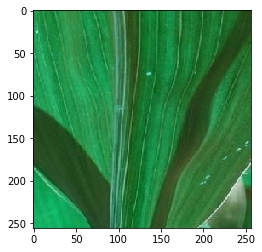

In [7]:
image = cv2.imread('C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/ImageDenoising/Input/L.jpg')
plt.imshow(image)
plt.show()

### Different Noising Techniques 

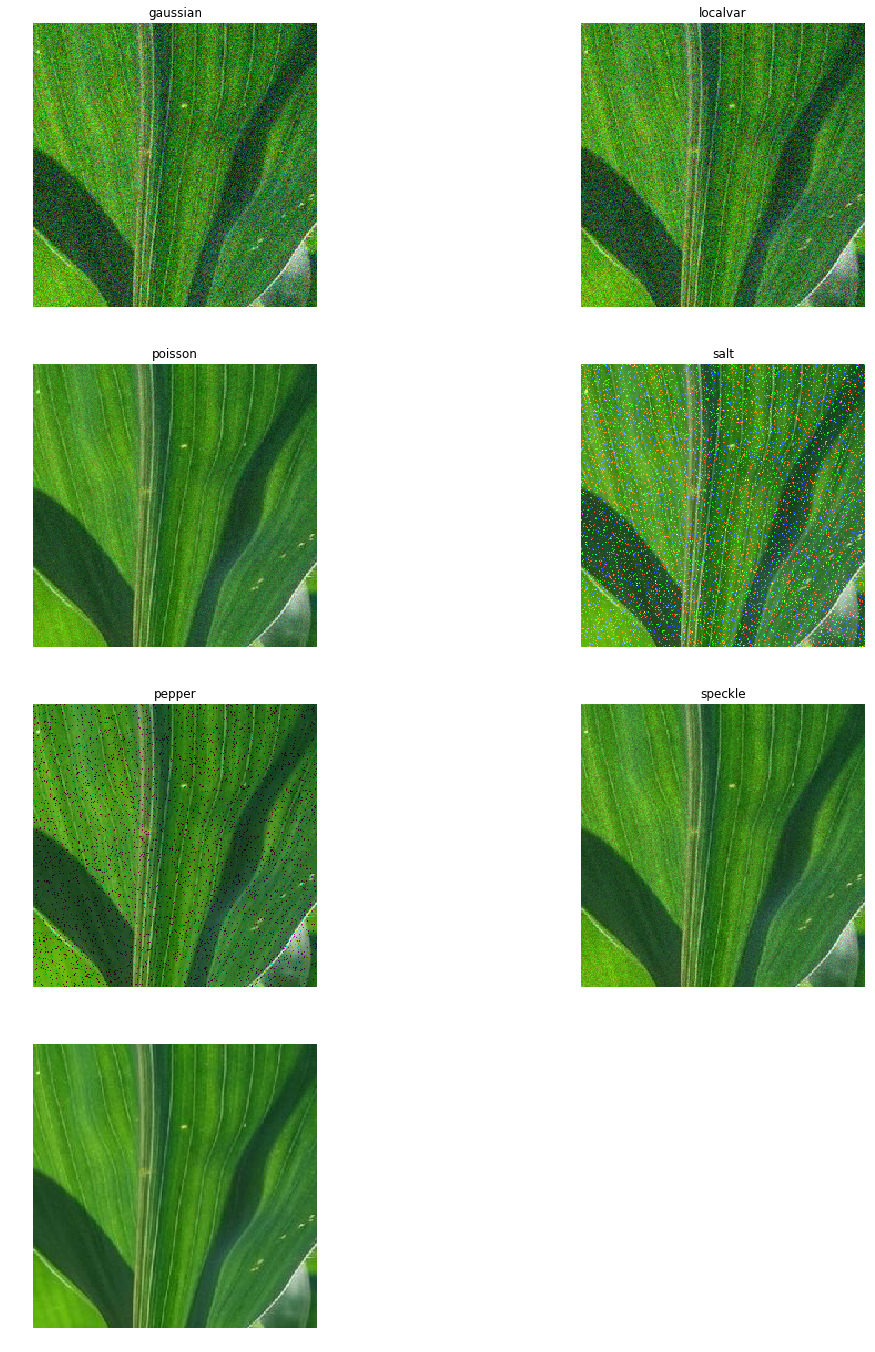

In [8]:
img_path='C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/ImageDenoising/Input/L.jpg'
img = skimage.io.imread(img_path)/255.0
def addnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    plt.axis("off")

plt.figure(figsize=(18,24))
r=4
c=2
addnoise(img, "gaussian", r,c,1)
addnoise(img, "localvar", r,c,2)
cv2.imwrite('X.jpg',addnoise(img, "poisson", r,c,3))
addnoise(img,"salt", r,c,4)
addnoise(img, "pepper", r,c,5)
addnoise(img, "speckle", r,c,6)
addnoise(img, None, r,c,7)
plt.show()

### Image with Gaussian Noise 

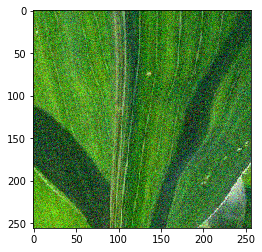

In [9]:
gauss_img=skimage.util.random_noise(img, "gaussian")
plt.imshow(gauss_img)
plt.show()

### Blurring the noisy image to generate low frequency component 

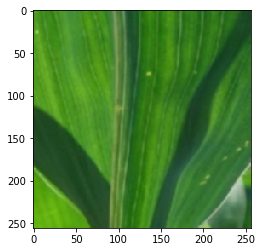

True

In [10]:
img_1 = cv2.GaussianBlur(img, (5, 5), 0)
plt.imshow(img_1)
plt.show()
cv2.imwrite('BG1.jpg', img_1)

### Generating high frequency components from the noisy image

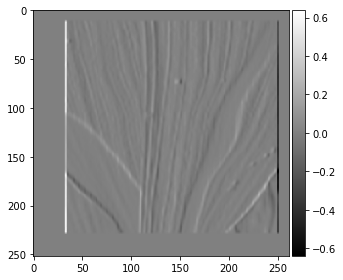

In [11]:
#reading the image 
image = imread('C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/ImageDenoising/Blurred/B1.png',as_gray=True)
#calculating horizontal edges using prewitt kernel
edges_prewitt_horizontal = prewitt_h(image)

#calculating vertical edges using prewitt kernel
edges_prewitt_vertical = prewitt_v(image)

imshow(edges_prewitt_vertical, cmap='gray')

### Combing the high and low frequency components for denoising the image

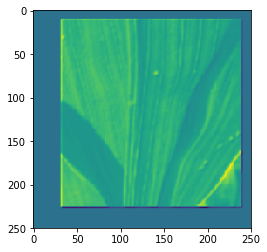

In [12]:
import matplotlib.pyplot as plt
x=cv2.imread('C:/Users/gupta.LAPTOP-F7P9M08K/Desktop/ImageDenoising/Blurred/B1.png') 
x=cv2.resize(x, tuple((250, 250)))
plt.imshow((edges_prewitt_vertical)+rgb2gray(x)+edges_prewitt_horizontal)
plt.show()